# ML Assignment 5: Classification with K-NN and SVM

#### 1. Importing libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Loading and Understanding the data

In [2]:
df = pd.read_csv('emails.csv')

In [3]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [4]:
df.shape

(5172, 3002)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


### 3. Handling Missing Values

In [6]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [7]:
df.dropna(inplace = True)

In [8]:
df.shape

(5172, 3002)

### 4. Dropping unnecesary columns

In [15]:
drop = ['Email No.']
df.drop(drop, axis=1, inplace=True)

### 5. Splitting the dataset into training and test sets

In [16]:
x = df.iloc[: , :-1].values
y = df.iloc[: , -1].values

In [17]:
print(x)

[[ 0  0  1 ...  0  0  0]
 [ 8 13 24 ...  0  1  0]
 [ 0  0  1 ...  0  0  0]
 ...
 [ 0  0  1 ...  0  0  0]
 [ 2  7  1 ...  0  1  0]
 [22 24  5 ...  0  0  0]]


In [18]:
print(y)

[0 0 0 ... 1 1 0]


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size =0.25, random_state=42)

In [20]:
print(X_train)

[[ 3  6  1 ...  0  1  0]
 [ 1  0  1 ...  0  0  0]
 [ 4  3 19 ...  0  0  0]
 ...
 [ 0  0  1 ...  0  0  0]
 [ 2 11  1 ...  0  3  0]
 [ 3  0  1 ...  0  0  0]]


In [21]:
print(X_test)

[[ 1  1  1 ...  0  0  0]
 [13 20 66 ...  0  0  0]
 [ 1 14  3 ...  0  5  0]
 ...
 [18 10 10 ...  0  0  0]
 [12  6  4 ...  0  2  0]
 [ 2  3  1 ...  0  0  0]]


In [22]:
print(y_train)

[1 0 0 ... 0 1 1]


In [23]:
print(y_test)

[0 0 1 ... 0 0 0]


### 6. Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.fit_transform(X_test)

In [25]:
print(X_train)

[[-0.3020719  -0.00981071 -0.29349781 ... -0.05909681  0.03852534
  -0.06785933]
 [-0.47453832 -0.65482303 -0.29349781 ... -0.05909681 -0.3268531
  -0.06785933]
 [-0.21583869 -0.33231687  0.96735274 ... -0.05909681 -0.3268531
  -0.06785933]
 ...
 [-0.56077153 -0.65482303 -0.29349781 ... -0.05909681 -0.3268531
  -0.06785933]
 [-0.38830511  0.52769956 -0.29349781 ... -0.05909681  0.7692822
  -0.06785933]
 [-0.3020719  -0.65482303 -0.29349781 ... -0.05909681 -0.3268531
  -0.06785933]]


In [26]:
print(X_test)

[[-0.49756096 -0.53759643 -0.29546753 ... -0.04822428 -0.33578325
  -0.08372184]
 [ 0.48878833  1.32676432  4.49939022 ... -0.04822428 -0.33578325
  -0.08372184]
 [-0.49756096  0.73801882 -0.14793344 ... -0.04822428  1.38573832
  -0.08372184]
 ...
 [ 0.8997672   0.34552182  0.36843585 ... -0.04822428 -0.33578325
  -0.08372184]
 [ 0.40659256 -0.04697518 -0.0741664  ... -0.04822428  0.35282538
  -0.08372184]
 [-0.41536519 -0.34134793 -0.29546753 ... -0.04822428 -0.33578325
  -0.08372184]]


### 7. Implementing KNN and metrics

In [48]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

y_pred = model.predict(X_test)

In [50]:
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()

accuracy = (tp+tn) / (tp+fp+fn+tn)
precision = (tp) / (tp+fp)
recall = (tp) / (tp+fn)
f1_score = 2*((recall*precision) / (recall+precision))

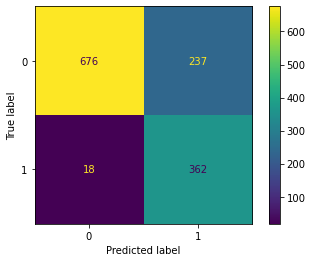

In [51]:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(cm).plot()

In [52]:
print( 
    'Accuracy:\t',accuracy*100,
    '\nPrecision:\t',precision*100,
    '\nRecall: \t',recall*100,
    '\nF1-Score:\t',f1_score*100)

Accuracy:	 80.2784222737819 
Precision:	 60.434056761268785 
Recall: 	 95.26315789473684 
F1-Score:	 73.95301327885598


In [53]:
print( 
    'Accuracy:\t',accuracy_score(y_test, y_pred)*100,
    '\nPrecision:\t',precision_score(y_test, y_pred)*100,
    '\nRecall: \t',recall_score(y_test, y_pred)*100,)

Accuracy:	 80.2784222737819 
Precision:	 60.434056761268785 
Recall: 	 95.26315789473684


### 8. Implementing SVM and metrics

In [54]:
from sklearn.svm import SVC

model = SVC(C=1)
model.fit(X_train, y_train)

SVC(C=1)

In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

y_pred = model.predict(X_test)

In [56]:
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()

accuracy = (tp+tn) / (tp+fp+fn+tn)
precision = (tp) / (tp+fp)
recall = (tp) / (tp+fn)
f1_score = 2*((recall*precision) / (recall+precision))

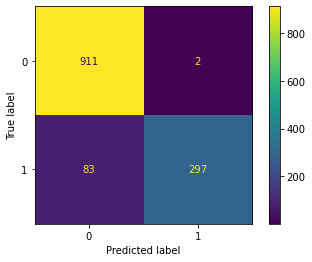

In [57]:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(cm).plot()

In [58]:
print( 
    'Accuracy:\t',accuracy*100,
    '\nPrecision:\t',precision*100,
    '\nRecall: \t',recall*100,
    '\nF1-Score:\t',f1_score*100)

Accuracy:	 93.4261407579273 
Precision:	 99.33110367892976 
Recall: 	 78.15789473684211 
F1-Score:	 87.48159057437407


In [59]:
print( 
    'Accuracy:\t',accuracy_score(y_test, y_pred)*100,
    '\nPrecision:\t',precision_score(y_test, y_pred)*100,
    '\nRecall: \t',recall_score(y_test, y_pred)*100,)

Accuracy:	 93.4261407579273 
Precision:	 99.33110367892976 
Recall: 	 78.15789473684211
